## **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## **Load and Explore the Data**

In [2]:
# Load the diabetes dataset
df = pd.read_csv('/content/diabetes_prediction_dataset.csv') #File location
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [3]:
# Basic dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.6

## **Plots and Graphs**

In [4]:
selected_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

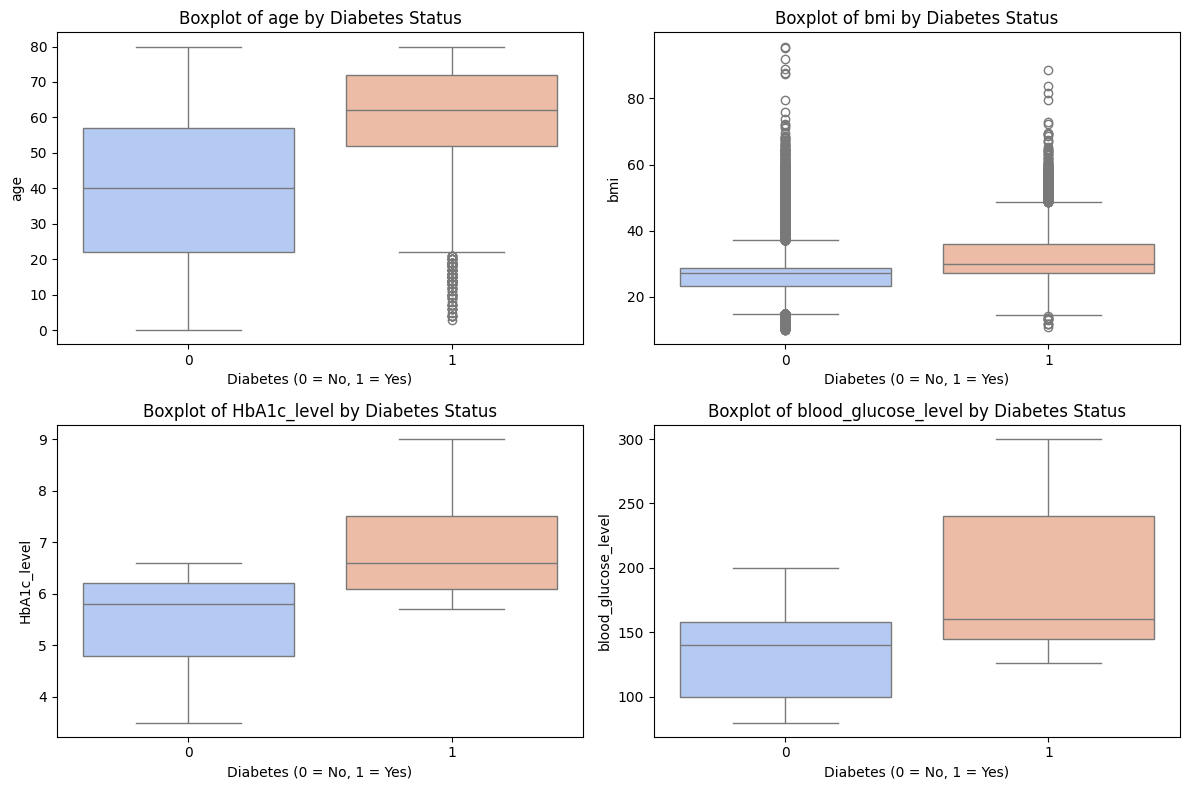

In [5]:
# Generate box plots for selected features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='diabetes', y=feature, hue='diabetes', palette="coolwarm", legend=False)
    plt.title(f'Boxplot of {feature} by Diabetes Status')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

- **Age vs. Diabetes:**  
  - Median age is slightly higher for diabetic individuals.  
  - Wide spread (IQR) suggests age alone is not a strong predictor.  

- **BMI vs. Diabetes:**  
  - Diabetic individuals tend to have higher BMI.  
  - Some overlap, but overall trend supports BMI as a risk factor.  

- **HbA1c Level vs. Diabetes:**  
  - **Strongest predictor** – clear separation between diabetic and non-diabetic groups.  
  - Higher HbA1c levels are strongly linked to diabetes.  

- **Blood Glucose Level vs. Diabetes:**  
  - Higher blood glucose levels indicate diabetes risk.  
  - Wide spread among diabetics suggests varying severity.  


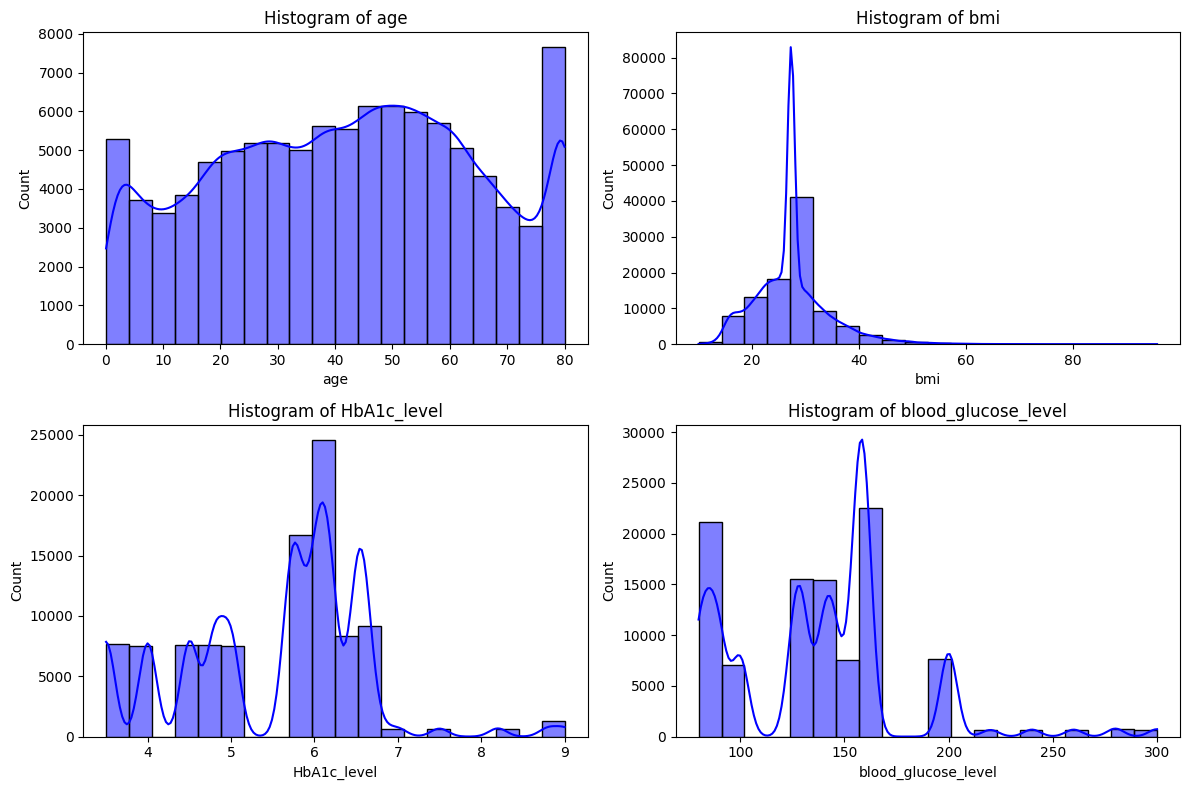

In [6]:
# Generate histograms for selected features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=20, kde="True", color="blue")
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- **Age:** Right-skewed; most individuals are younger.  
- **BMI:** Normal-like distribution; peaks around 20-30.  
- **HbA1c Level:** Right-skewed; higher values suggest possible diabetes.  
- **Blood Glucose Level:** Right-skewed; high values indicate diabetes risk.  


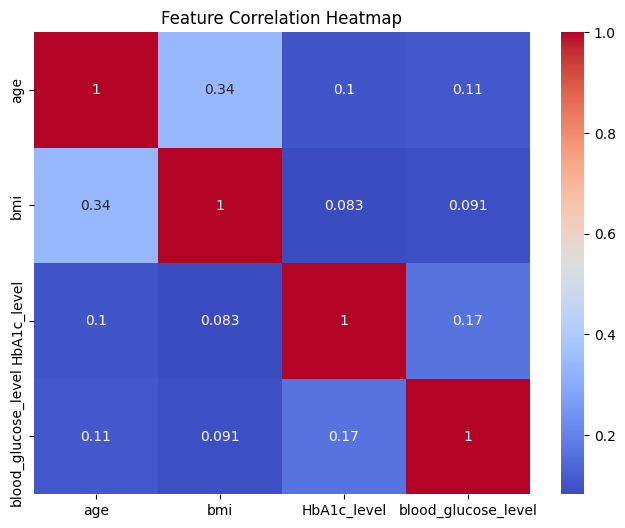

In [7]:
# Correlation Heatmap for Selected Features
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## **Split data and train the model**

In [10]:
#split the dataset into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

#Scale numerical features for better performence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Tarin and Logistic regression model
model = LogisticRegression(class_weight="balanced", random_state=42) #Adjusted for class imbalance
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

## **Data processing and scaling**

In [16]:
# Handling missing values
df = df.dropna()  # Drop missing values for simplicity

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define independent (X) and dependent (y) variables
X = df.drop(columns=["diabetes"])  # Features
y = df["diabetes"]  # Target variable

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Trainning the model**

In [17]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

## **Evaluation**

In [19]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



- **Accuracy:** 96% → The model is correct in **96 out of 100 cases**.  
- **Non-Diabetic (0) Predictions:**  
  - **Precision:** 97% (Mostly correct when predicting non-diabetes).  
  - **Recall:** 99% (Almost all non-diabetic cases detected).  
- **Diabetic (1) Predictions:**  
  - **Precision:** 86% (Most diabetic predictions are correct).  
  - **Recall:** 62% (Misses some diabetic cases).  
- **Key Insight:**  
  ✅ High accuracy but **misses some diabetics** (false negatives).
